# K-Nearest Neighbours from Scratch

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Loading Data
Retrieved from [Kaggle - Iris Flower Dataset](https://www.kaggle.com/datasets/sims22/irisflowerdatasets)

In [3]:
df = pd.read_csv('iris.csv')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


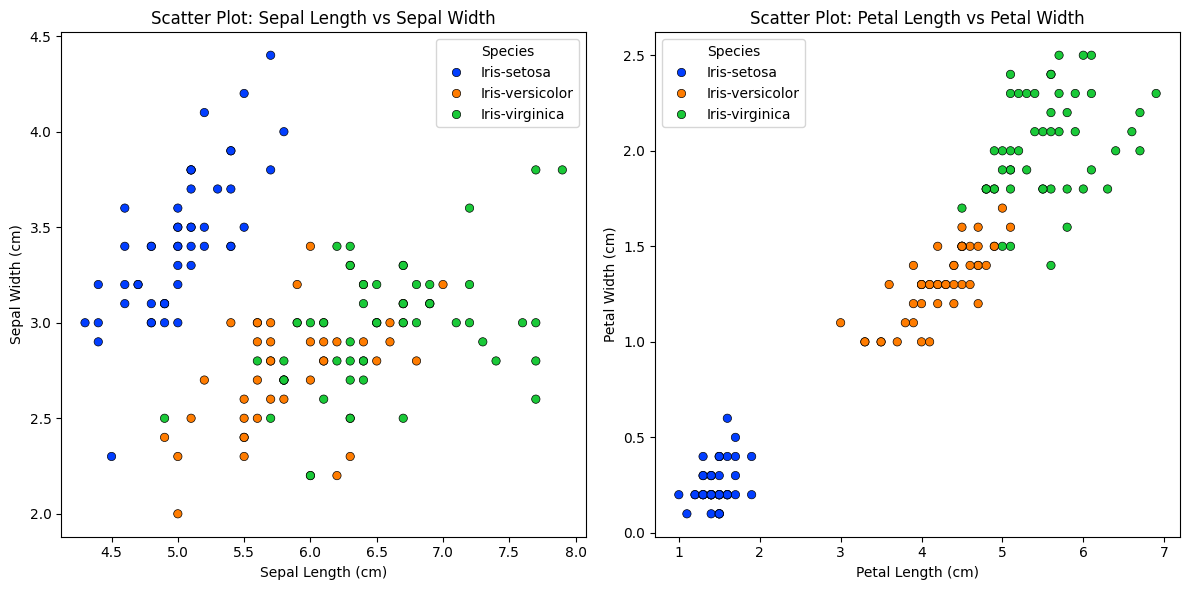

In [22]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))

# Figure 1 (left)
sns.scatterplot(ax=axes[0], data=df, x='sepal_length', y='sepal_width', hue='species', palette='bright', edgecolor = "black")
axes[0].set_title('Scatter Plot: Sepal Length vs Sepal Width')
axes[0].set_xlabel('Sepal Length (cm)')
axes[0].set_ylabel('Sepal Width (cm)')
axes[0].legend(title="Species")

# Figure2 (right)
sns.scatterplot(ax=axes[1], data=df, x='petal_length', y='petal_width', hue='species', palette='bright', edgecolor = "black")
axes[1].set_title('Scatter Plot: Petal Length vs Petal Width')
axes[1].set_xlabel('Petal Length (cm)')
axes[1].set_ylabel('Petal Width (cm)')
axes[1].legend(title="Species")
plt.tight_layout()
plt.show()

## 2. Distance Metrics 

### Euclidean Distance

\begin{align*}
\sqrt{\sum_{i=1}^{n} (q_i - p_i)^2}
\end{align*}


### Manhattan Distance

\begin{align*}
\sum_{i=1}^{n} \sqrt{|q_i - p_i|}
\end{align*}


### Minkowski Distance

\begin{align*}
(\sum_{i=1}^{n} |q_i - p_i|^p)^{\frac{1}{p}}
\end{align*}


In [ ]:
# Calculate Eucliean Distance
def calculate_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

## 3. Train Test Split

In [291]:
def train_test_split(X, y, test_size=0.2, random_seed=None):
    # Set a random seed if it exists
    if random_seed:
        np.random.seed(random_seed)

    # Create a list of numbers from 0 to len(X)
    indices = np.arange(len(X))

    # Shuffle the indices
    np.random.shuffle(indices)

    # Define the size of our test data from len(X)
    test_size = int(test_size * len(X))

    # Generate indices for test and train data
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]

    # Return: X_train, X_test, y_train, y_test
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

## 4. KNN Classifier

In [1]:
def knn_classifier(X_train, y_train, X_test, k):
    prediction_list = []

    # For each point in X_test, calculate the distance to all the points in X_train.
    for x_test in X_test:
        distance_list = []
        for x_train in X_train:
            # Add the calculated distance to distance_list.
            distance_list.append(calculate_distance(
                x_test, x_train))

        # Select k neighbours based on the distance in descending order.
        k_neighbours = np.argsort(distance_list)[:k]

        # Majority vote amongst k neighbours to determine a label of each point.
        k_neighbour_labels = [y_train[i] for i in k_neighbours]
        most_common = max(k_neighbour_labels, key=k_neighbour_labels.count)

        # Add the most common label to prediction_list as a prediction.
        prediction_list.append(most_common)
    return prediction_list

## 5. Calculating Accuracy

In [295]:
def calculate_accuracy(y_true, y_pred, n_samples):
    correct_predictions = np.sum(y_true == y_pred)
    return (correct_predictions / n_samples) * 100

In [ ]:
X = df.iloc[:, :-1].values  # Set our training data
y = df.iloc[:, -1].values  # Set training labels
k = 7
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_seed=42)
n_samples_test = len(y_test)
predictions = knn_classifier(
    X_train, y_train, X_test, k)
accuracy = calculate_accuracy(y_test, predictions, n_samples_test)
print(f"Accuracy for k = {k}: {accuracy:.2f} %")

Accuracy for k = 7: 96.67 %


## 6. KNN Classifier with Objective-Oriented Design (OOD)

In [294]:
class KNN_Classifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def calculate_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def predict(self, X_test):
        return np.array([self.calculate_pred(x_test) for x_test in X_test])

    def calculate_pred(self, x_test):
        distance_list = [calculate_distance(x_test, x_train) for x_train in self.X_train]

        k_neighbours = np.argsort(distance_list)[:self.k]
        
        k_neighbours_labels = [self.y_train[i] for i in k_neighbours]
        most_common = max(k_neighbours_labels, key=k_neighbours_labels.count)
        return most_common
        
    
X = df.iloc[:, :-1].values  # Set our training data
y = df.iloc[:, -1].values  # Set training labels
k = 7
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_seed=42)
n_samples_test = len(y_test)

knn_classifier = KNN_Classifier(k=k)
knn_classifier.fit(X_train, y_train)
predictions = knn_classifier.predict(X_test)

accuracy = calculate_accuracy(y_test, predictions, n_samples_test)
print(f"Accuracy for k = {k}: {accuracy:.2f} %")

Accuracy for k = 7: 96.67 %
